In [15]:
import numpy as np
import pandas as pd
import nltk
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error,accuracy_score,confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer,TfidfVectorizer
from nltk.stem.lancaster import LancasterStemmer
from sklearn.decomposition import TruncatedSVD
import gensim
import contractions



In [16]:
data=pd.read_csv("data/yelp-text-by-stars.csv",delimiter=";" ,encoding="iso-8859-1")
X=data.iloc[:,1]
Y=data.iloc[:,0]

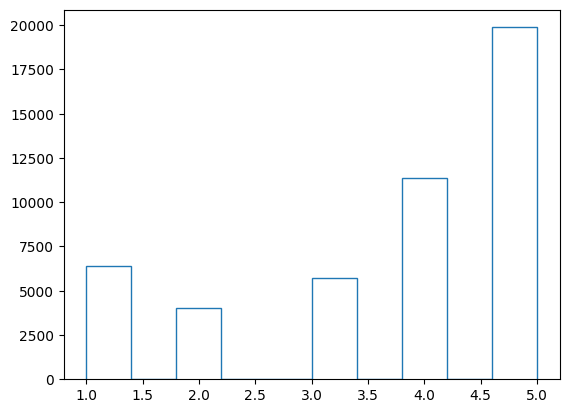

In [17]:
Y.describe
counts, bins = np.histogram(Y)
plt.stairs(counts, bins)

In [18]:
# Nettoyage des textes
def clean(data):
    # Transformation en minuscule
    X = data.str.lower()
    
    # Reconstruction des contractions type "dont" "they're"
    X = X.apply(lambda x: contractions.fix(x))
    
    # Suppression des liens et des caractères spéciaux
    X = X.replace(to_replace=r'^https?:\/\/.*[\r\n]*|[\'.,!?$()*%@\"-_]', value='', regex=True)
    
    # Initialisation du stemmer
    stemmer = LancasterStemmer()
    
    # Application de la stemmatisation sur chaque texte
    stems = [' '.join([stemmer.stem(w) for w in text.split()]) for text in X]
    
    return pd.Series(stems)

Nettoyages des textes

In [19]:
corpus=clean(X)


In [20]:
corpus.head(5)

0    board my engl mastiff her ov new year they ar ...
1    anoth cas of the emp new cloth someon of the a...
2    cam on valentin day night hav prebought ticket...
3    nd tim eat her todayst tim was gre but now i d...
4    allegy is a disast their far ar cheap but not ...
dtype: object

In [21]:
# Création des ensemble d'entrainnement et de test
corpus_train,corpus_test,y_train,y_test=train_test_split(corpus,Y,test_size=0.33,shuffle=True,random_state=1)

In [22]:
# Fonction d'execution des algorithmes de prediction
def run_models (X_train,Y_train,X_test,Y_test,algos):
    for algo_name in algos:
        model=algos[algo_name]
        model.fit(X_train,Y_train)
        prediction=model.predict(X_test)
        prediction[prediction<1]=1
        prediction[prediction>5]=5
        MAE=mean_absolute_error(Y_test,prediction)
        ACC=accuracy_score(Y_test,np.round(prediction))
        
        print('################## {0} #############'.format(algo_name))
        print('MAE = {0:.3f}, Accuracy ={1:.3f}'.format(MAE,ACC))
        display(confusion_matrix(Y_test,np.round(prediction)))
        print()

In [23]:
algos = {
'RF' : RandomForestRegressor(n_estimators=50,random_state=1,n_jobs=-1),
 'KNN' : KNeighborsRegressor(n_neighbors=5,n_jobs=-1,metric='cosine'),
  'MLP' : MLPRegressor(hidden_layer_sizes=(20,10),max_iter=200,random_state=1,alpha=0.001)
}

Utilisation de TF-IDF

In [24]:
TFIDF=TfidfVectorizer(max_features=1000,stop_words='english')
TFIDF.fit(corpus_train)
corpus_train_tfidf=TFIDF.transform(corpus_train)
corpus_test_tfidf=TFIDF.transform(corpus_test)


In [25]:
# Pour afficher le premier texte transformé par TFIDF
corpus_train_tfidf[0].toarray()

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.24252485, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.32965217, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [26]:
# Pour afficher le vocabulaire gardé par TFIDF
TFIDF.vocabulary_ 

{'nic': 559,
 'shop': 775,
 'easy': 266,
 'appoint': 37,
 'profess': 672,
 'friend': 345,
 'act': 5,
 'gre': 369,
 'convers': 179,
 'dur': 263,
 'cut': 208,
 'styl': 850,
 'perfect': 617,
 'serv': 768,
 'excel': 289,
 'today': 898,
 'tim': 893,
 'und': 928,
 'awesom': 52,
 'expery': 293,
 'definit': 220,
 'wil': 974,
 'going': 364,
 'addit': 7,
 'bbq': 63,
 'favorit': 313,
 'food': 333,
 'sint': 785,
 'liv': 481,
 'happy': 386,
 'try': 921,
 'new': 558,
 'spot': 825,
 'op': 580,
 'stand': 829,
 'loc': 483,
 'let': 470,
 'hid': 399,
 'ar': 39,
 'park': 605,
 'lot': 489,
 'warm': 952,
 'sid': 779,
 'mex': 525,
 'resta': 713,
 'insid': 433,
 'fant': 307,
 'cle': 152,
 'simpl': 782,
 'ther': 883,
 'long': 485,
 'tabl': 863,
 'thos': 889,
 'want': 950,
 'enjoy': 276,
 'did': 233,
 'hom': 404,
 'husband': 418,
 'select': 763,
 'meat': 513,
 'spec': 816,
 'com': 161,
 'pric': 665,
 'mor': 542,
 'reason': 692,
 'qual': 678,
 'includ': 427,
 'ad': 6,
 'corn': 183,
 'shar': 773,
 'al': 18,
 'tri

In [27]:
run_models (corpus_train_tfidf.toarray(),y_train,corpus_test_tfidf.toarray(),y_test,algos)

################## RF #############
MAE = 0.745, Accuracy =0.451


array([[ 544,  848,  483,  241,   28],
       [  75,  393,  530,  341,   39],
       [  25,  184,  705,  885,   88],
       [   5,   98,  613, 2258,  687],
       [   7,  109,  478, 2812, 3157]], dtype=int64)


################## KNN #############
MAE = 0.909, Accuracy =0.361


array([[ 323,  663,  648,  439,   71],
       [  61,  245,  519,  477,   76],
       [  21,  169,  614,  946,  137],
       [  13,  128,  811, 2061,  648],
       [  20,  140,  919, 3079, 2405]], dtype=int64)


################## MLP #############
MAE = 0.745, Accuracy =0.513


array([[1353,  366,  186,  142,   97],
       [ 419,  329,  295,  214,  121],
       [ 201,  325,  486,  547,  328],
       [ 141,  250,  560, 1262, 1448],
       [ 132,  191,  409, 1249, 4582]], dtype=int64)

En utlisant TF-IDF on remarque que le KNN a les moins bons résultats cela est du a difficulté de calculer les distance dans un espace de trés grande dimension

Application de la SVD

In [28]:
# Création d'une SVD qui garde 100 composantes les plus importantes 
SVD=TruncatedSVD(n_components=100)
# Application de la SVD sur sur le corpus train et test obtenu précedemment avec TF-IDF
SVD.fit(corpus_train_tfidf)
corpus_train_SVD=SVD.transform(corpus_train_tfidf)
corpus_test_SVD=SVD.transform(corpus_test_tfidf)

In [29]:
run_models (corpus_train_SVD,y_train,corpus_test_SVD,y_test,algos)

################## RF #############
MAE = 0.789, Accuracy =0.417


array([[ 290,  933,  666,  238,   17],
       [  31,  355,  652,  319,   21],
       [   5,  163,  872,  787,   60],
       [   2,   83,  901, 2152,  523],
       [   5,  108,  648, 2949, 2853]], dtype=int64)


################## KNN #############
MAE = 0.872, Accuracy =0.386


array([[ 533,  735,  540,  301,   35],
       [  99,  377,  513,  344,   45],
       [  35,  223,  765,  764,  100],
       [  25,  175, 1017, 1863,  581],
       [  38,  224, 1022, 2775, 2504]], dtype=int64)


################## MLP #############
MAE = 0.668, Accuracy =0.509


array([[ 839,  811,  313,  157,   24],
       [ 175,  467,  474,  235,   27],
       [  51,  301,  716,  736,   83],
       [  14,  126,  647, 2071,  803],
       [  16,  132,  393, 2163, 3859]], dtype=int64)

On remarque qu'avec la SVD l'algorithme de KNN augmente un peux ses performances cela est du a la réduction de la dimension par contre l'algorithme random forest perd en performance car a cause de la SVD il y a moins d'héterogéniété dans les données.

Utilisation des embedding word to vec

In [30]:
corpus_tokens=corpus.apply(lambda x: x.split(" "))

In [31]:
corpus_tokens

0        [board, my, engl, mastiff, her, ov, new, year,...
1        [anoth, cas, of, the, emp, new, cloth, someon,...
2        [cam, on, valentin, day, night, hav, prebought...
3        [nd, tim, eat, her, todayst, tim, was, gre, bu...
4        [allegy, is, a, disast, their, far, ar, cheap,...
                               ...                        
47366    [thi, is, our, favorit, coff, plac, in, mont, ...
47367    [had, to, visit, the, carlo, bakery, and, went...
47368    [som, of, the, best, tom, yum, we, hav, ev, ha...
47369    [thi, is, the, best, groom, in, the, valley, s...
47370    [i, agr, with, the, oth, review, thi, is, a, g...
Length: 47371, dtype: object

In [32]:
import multiprocessing
cores=multiprocessing.cpu_count()
cores

8

Création d'un modele W2V de taille 100 entrainné sur nos données 

In [33]:
model_size=100
model=gensim.models.Word2Vec(corpus_tokens,vector_size=model_size,sg=0,window=5,min_count=2,workers=cores-1)

Entrainnement du modele 

In [34]:
for i in range(100):
    model.train(corpus_tokens,total_examples=len(corpus),epochs=1)
    print(i, end=' ')

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 

Sauvegarde du modele

In [35]:
model.save('models/Word2vec_entraine.h5')

In [36]:
#Chargement du modele
model=gensim.models.Word2Vec.load('models/Word2vec_entraine.h5')

In [37]:
len(model.wv.index_to_key)

22629

Fonction pour generer l'embedding d'un texte en utilisant un modele W2V

In [38]:
## get word2vec for each sentences by using average word embeddings
def word2vec_generator(texts,model,vector_size):
    dict_word2vec = {}
    for index, word_list in enumerate(texts):
        arr = np.array([0.0 for i in range(0, vector_size)])
        nb_word=0
        for word in word_list:
            try:
                arr += model[word]
                nb_word=nb_word+1
            except KeyError:
                continue
        if(len(word_list) == 0):
            dict_word2vec[index] = arr
        else:
            dict_word2vec[index] = arr / nb_word
    df_word2vec = pd.DataFrame(dict_word2vec).T
    return df_word2vec

In [39]:
corpus_train_tokens=corpus_train.apply(lambda x: x.split(" "))
corpus_test_tokens=corpus_test.apply(lambda x: x.split(" "))
corpus_train_tokens[0]

['board',
 'my',
 'engl',
 'mastiff',
 'her',
 'ov',
 'new',
 'year',
 'they',
 'ar',
 'clos',
 'on',
 'sunday',
 'so',
 'ev',
 'though',
 'we',
 'got',
 'hom',
 'on',
 'sunday',
 'we',
 'had',
 'to',
 'leav',
 'him',
 'her',
 'anoth',
 'day',
 'and',
 'pay',
 'for',
 'anoth',
 'day',
 'becaus',
 'we',
 'could',
 'not',
 'pick',
 'him',
 'up',
 'until',
 'monday',
 'morn',
 'he',
 'got',
 'a',
 'comply',
 'bath',
 'with',
 'his',
 'board',
 'when',
 'i',
 'did',
 'pick',
 'him',
 'up',
 'ont',
 'i',
 'got',
 'him',
 'in',
 'the',
 'car',
 'i',
 'not',
 'a',
 'very',
 'pung',
 'musky',
 'od',
 'could',
 'not',
 'fig',
 'out',
 'what',
 'it',
 'was',
 'until',
 'i',
 'got',
 'him',
 'hom',
 'the',
 'smel',
 'was',
 'so',
 'bad',
 'i',
 'had',
 'to',
 'leav',
 'the',
 'car',
 'window',
 'op',
 'to',
 'air',
 'it',
 'out',
 'he',
 'had',
 'a',
 'green',
 'mat',
 'on',
 'the',
 'undersid',
 'of',
 'his',
 'tail',
 'and',
 'around',
 'his',
 'but',
 'i',
 'tri',
 'to',
 'cle',
 'it',
 'off',

In [40]:
vector_size=model.vector_size
# embedding des ensembles train et test avec le modele W2V 
corpus_train_wv_entraine=word2vec_generator(corpus_train_tokens,model.wv,vector_size)
corpus_test_wv_entraine=word2vec_generator(corpus_test_tokens,model.wv,vector_size)

In [41]:
corpus_train_wv_entraine.iloc[0,:]

0     0.343032
1    -0.660038
2     0.419913
3     0.053538
4    -0.233734
        ...   
95    0.419921
96   -0.524470
97   -0.120332
98    0.087769
99    0.692763
Name: 0, Length: 100, dtype: float64

In [42]:
# Execution des algorithmes de prédiction
run_models (corpus_train_wv_entraine,y_train,corpus_test_wv_entraine,y_test,algos)

################## RF #############
MAE = 0.876, Accuracy =0.353


array([[ 114,  729,  962,  328,   11],
       [  20,  237,  740,  371,   10],
       [   1,  141,  879,  850,   16],
       [   2,   74,  836, 2415,  334],
       [   3,   56,  847, 3779, 1878]], dtype=int64)


################## KNN #############
MAE = 0.843, Accuracy =0.411


array([[ 438,  649,  640,  358,   59],
       [  90,  258,  508,  461,   61],
       [  41,  157,  591,  955,  143],
       [  16,  120,  614, 2150,  761],
       [  23,  161,  672, 2724, 2983]], dtype=int64)


################## MLP #############
MAE = 0.674, Accuracy =0.514


array([[ 695,  844,  419,  152,   34],
       [ 121,  476,  519,  236,   26],
       [  43,  276,  717,  751,  100],
       [  17,  155,  642, 1908,  939],
       [  14,  104,  423, 1785, 4237]], dtype=int64)

Les résultat obtenu sont legerements meilleurs qu'avec les autres méthodes et ils peuvent etre amélioré en augmentant la taille de l'embedding

Utilisation du modele W2V de google de taille 300

In [43]:
model_wv_google=gensim.models.KeyedVectors.load_word2vec_format('models/GoogleNews-vectors-negative300.bin.gz'
                                                                , binary=True)

In [44]:
model_wv_google.vector_size

300

In [45]:
#corpus_train_tokens[0]
vector_size=model_wv_google.vector_size
corpus_train_wv_google=word2vec_generator(corpus_train_tokens,model_wv_google,vector_size)
corpus_test_wv_google=word2vec_generator(corpus_test_tokens,model_wv_google,vector_size)

In [46]:
nan_locations = corpus_train_wv_google.isnull().sum().sum()
print(nan_locations)

900


## le Word2Vec de google génere des valeurs null dans les embedding ce qui fait cracher les algo de prédiction

In [47]:
run_models(corpus_train_wv_google,y_train,corpus_test_wv_google,y_test,algos)

ValueError: Input X contains NaN.
RandomForestRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

Implémentation de LSTM

In [48]:
def to_sequence(index, text):
    indexes = [index[word] for word in text if word in index]
    return indexes

word2idx = {word: idx for idx, word in enumerate(model.wv.index_to_key)}
X_train_sequences = [to_sequence(word2idx, x) for x in corpus_train_tokens]
X_test_sequences = [to_sequence(word2idx, x) for x in corpus_test_tokens]

print(corpus_train_tokens.values[0])
print(X_train_sequences[0])

['nic', 'shop', 'easy', 'to', 'get', 'an', 'appoint', 'ladygirl', 'was', 'profess', 'friend', 'and', 'act', 'had', 'a', 'gre', 'convers', 'dur', 'the', 'cut', 'styl', 'was', 'perfect', 'and', 'serv', 'was', 'excel']
[85, 244, 357, 4, 40, 61, 489, 5, 452, 65, 1, 218, 23, 3, 38, 910, 364, 0, 282, 423, 5, 202, 1, 28, 5, 249]


In [49]:
from keras.preprocessing.sequence import pad_sequences

In [50]:
MAX_SEQ_LENGHT=50
N_FEATURES = len(model.wv.index_to_key)
X_train_sequences = pad_sequences(X_train_sequences, maxlen=MAX_SEQ_LENGHT, value=N_FEATURES)
X_test_sequences = pad_sequences(X_test_sequences, maxlen=MAX_SEQ_LENGHT, value=N_FEATURES)
print(X_train_sequences[0])

[22629 22629 22629 22629 22629 22629 22629 22629 22629 22629 22629 22629
 22629 22629 22629 22629 22629 22629 22629 22629 22629 22629 22629 22629
    85   244   357     4    40    61   489     5   452    65     1   218
    23     3    38   910   364     0   282   423     5   202     1    28
     5   249]


In [51]:
EMBEDDINGS_LEN = model.wv.vector_size
embeddings_index = np.zeros((len(model.wv.index_to_key)+1, EMBEDDINGS_LEN))
embeddings_index.shape

(22630, 100)

In [52]:
EMBEDDINGS_LEN = model.wv.vector_size
embeddings_index = np.zeros((len(model.wv.index_to_key)+1, EMBEDDINGS_LEN))
for word, idx in word2idx.items():
    try:
        embedding = model.wv[word]
        embeddings_index[idx] = embedding
    except:
        pass
      
print("EMBEDDINGS_LEN=", EMBEDDINGS_LEN)

EMBEDDINGS_LEN= 100


In [53]:
from keras.models import Sequential
from keras.layers import Embedding, Dense,LSTM

# declaration de l'architecture du modele

model_lstm = Sequential()
model_lstm.add(Embedding(len(model.wv.key_to_index)+1,
                    EMBEDDINGS_LEN,  # Embedding size
                    weights=[embeddings_index],
                    trainable=False))

#model_Bilstm.add(Embedding(30000,
#                    300,  # Embedding size
#                    input_length=50,
#                    trainable=True))

model_lstm.add(LSTM(300, dropout=0.2,return_sequences=True))
model_lstm.add(LSTM(100, dropout=0.2))

#model_lstm.add(Bidirectional(LSTM(128,recurrent_dropout=0.2, return_sequences=True),merge_mode='concat'))
#model_lstm.add(Bidirectional(LSTM(128,recurrent_dropout=0.2, return_sequences=False),merge_mode='concat'))


model_lstm.add(Dense(1))
model_lstm.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
model_lstm.summary()






Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 100)         2263000   
                                                                 
 lstm (LSTM)                 (None, None, 300)         481200    
                                                                 
 lstm_1 (LSTM)               (None, 100)               160400    
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 2904701 (11.08 MB)
Trainable params: 641701 (2.45 MB)
Non-trainable params: 2263000 (8.63 MB)
_________________________________________________________________


In [54]:
history = model_lstm.fit(X_train_sequences, y_train, epochs=10, batch_size=128, verbose=1,validation_split=0.1)

Epoch 1/10


224/224 [==============================] - 67s 279ms/step - loss: 0.9108 - mean_absolute_error: 0.9108 - val_loss: 0.7127 - val_mean_absolute_error: 0.7127
Epoch 2/10
224/224 [==============================] - 59s 263ms/step - loss: 0.6719 - mean_absolute_error: 0.6719 - val_loss: 0.6226 - val_mean_absolute_error: 0.6226
Epoch 3/10
224/224 [==============================] - 59s 261ms/step - loss: 0.6125 - mean_absolute_error: 0.6125 - val_loss: 0.5974 - val_mean_absolute_error: 0.5974
Epoch 4/10
224/224 [==============================] - 59s 262ms/step - loss: 0.5712 - mean_absolute_error: 0.5712 - val_loss: 0.5868 - val_mean_absolute_error: 0.5868
Epoch 5/10
224/224 [==============================] - 60s 269ms/step - loss: 0.5518 - mean_absolute_error: 0.5518 - val_loss: 0.6015 - val_mean_absolute_error: 0.6015
Epoch 6/10
224/224 [==============================] - 60s 268ms/step - loss: 0.5255 - mean_absolute_error: 0.5255 - val_loss: 0.5673 - val_mean_absolute_error: 0.5

In [55]:
scores_lstm = model_lstm.evaluate(X_test_sequences, y_test, verbose=1)

489/489 [==============================] - 25s 51ms/step - loss: 0.5340 - mean_absolute_error: 0.5340


In [56]:
prediction=model_lstm.predict(X_test_sequences)
prediction[prediction<1]=1
prediction[prediction>5]=5
ACC=accuracy_score(y_test,np.round(prediction))
MAE=mean_absolute_error(y_test,prediction)
print('For LSTM MAE = {0:.3f}, Accuracy ={1:.3f}'.format(MAE,ACC))
display(confusion_matrix(y_test,np.round(prediction)))

489/489 [==============================] - 26s 52ms/step
For LSTM MAE = 0.531, Accuracy =0.604


array([[1564,  291,  109,   91,   89],
       [ 462,  467,  211,  182,   56],
       [ 156,  349,  441,  712,  229],
       [  60,  122,  297, 1714, 1468],
       [  59,   64,  129, 1059, 5252]], dtype=int64)

## Utilisation de la sortie des LSTM dans d'autres modèles supervisés

In [57]:
model_lstm.layers

In [58]:
from keras.models import Model
#Création d'un modele qui prend en entrée les memes données que le modele lstm et qui renvoie les sorties de l'avant derniere couche
#C'est à dire les features extraites par le LSTM qui correspondent au contexte de chaque texte
Model_rf = Model(inputs=model_lstm.inputs, outputs=model_lstm.layers[2].output)

#Sauvegarde du modele
Model_rf.save('models/model_lstm_features.h5')

#Création des du contexte des données train et test
corpus_train_lstm = Model_rf.predict(X_train_sequences)
corpus_test_lstm = Model_rf.predict(X_test_sequences)


489/489 [==============================] - 19s 39ms/step


In [59]:
corpus_train_lstm.shape

(31738, 100)

In [60]:
#Execution des algorithmes de prediction sur les features extraites par le LSTM
run_models(corpus_train_lstm,y_train,corpus_test_lstm,y_test,algos)

################## RF #############
MAE = 0.587, Accuracy =0.564


array([[1089,  676,  214,  127,   38],
       [ 220,  572,  377,  185,   24],
       [  51,  349,  631,  737,  119],
       [  15,  111,  439, 2076, 1020],
       [  22,   73,  226, 1789, 4453]], dtype=int64)


################## KNN #############
MAE = 0.597, Accuracy =0.565


array([[1163,  606,  198,  117,   60],
       [ 283,  503,  358,  194,   40],
       [  79,  310,  605,  709,  184],
       [  28,  109,  420, 1902, 1202],
       [  26,   68,  225, 1586, 4658]], dtype=int64)


################## MLP #############
MAE = 0.569, Accuracy =0.588


array([[1198,  553,  219,  117,   57],
       [ 242,  520,  388,  195,   33],
       [  73,  286,  653,  725,  150],
       [  26,   83,  424, 1902, 1226],
       [  24,   71,  187, 1364, 4917]], dtype=int64)

## Implementation Bidirectionnal LSTM

In [61]:
from keras.layers import Bidirectional

# Déclaration de l'architecture du modèle
model_bilstm = Sequential()

# Ajout de la couche d'embedding en entrée du modèle
model_bilstm.add(Embedding(len(model.wv.key_to_index) + 1,
                            EMBEDDINGS_LEN,  # Embedding size
                            weights=[embeddings_index],
                            trainable=False))
# Ajout de la couche BiLSTM avec une sortie
model_bilstm.add(Bidirectional(LSTM(300, dropout=0.2, return_sequences=True)))

# Ajout de la couche BiLSTM avec sans sortie
model_bilstm.add(Bidirectional(LSTM(100, dropout=0.2)))

# Ajout de la couche de sortie avec un neurone
model_bilstm.add(Dense(1))
model_bilstm.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
model_bilstm.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 100)         2263000   
                                                                 
 bidirectional (Bidirection  (None, None, 600)         962400    
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 200)               560800    
 onal)                                                           
                                                                 
 dense_1 (Dense)             (None, 1)                 201       
                                                                 
Total params: 3786401 (14.44 MB)
Trainable params: 1523401 (5.81 MB)
Non-trainable params: 2263000 (8.63 MB)
_________________________________________________________________


In [62]:
history = model_bilstm.fit(X_train_sequences, y_train, epochs=10, batch_size=128, verbose=1,validation_split=0.1)

Epoch 1/10
224/224 [==============================] - 124s 515ms/step - loss: 0.8719 - mean_absolute_error: 0.8719 - val_loss: 0.7490 - val_mean_absolute_error: 0.7490
Epoch 2/10
224/224 [==============================] - 121s 539ms/step - loss: 0.6797 - mean_absolute_error: 0.6797 - val_loss: 0.6496 - val_mean_absolute_error: 0.6496
Epoch 3/10
224/224 [==============================] - 121s 540ms/step - loss: 0.6288 - mean_absolute_error: 0.6288 - val_loss: 0.6103 - val_mean_absolute_error: 0.6103
Epoch 4/10
224/224 [==============================] - 124s 553ms/step - loss: 0.5966 - mean_absolute_error: 0.5966 - val_loss: 0.5957 - val_mean_absolute_error: 0.5957
Epoch 5/10
224/224 [==============================] - 132s 591ms/step - loss: 0.5534 - mean_absolute_error: 0.5534 - val_loss: 0.5925 - val_mean_absolute_error: 0.5925
Epoch 6/10
224/224 [==============================] - 116s 519ms/step - loss: 0.5270 - mean_absolute_error: 0.5270 - val_loss: 0.6090 - val_mean_absolute_error:

In [63]:
scores_bilstm = model_bilstm.evaluate(X_test_sequences, y_test, verbose=1)

489/489 [==============================] - 25s 50ms/step - loss: 0.5345 - mean_absolute_error: 0.5345


In [64]:
#Création d'un modele qui prend en entrée les memes données que le modele bilstm et qui renvoie les sorties de l'avant derniere couche
#C'est à dire les features extraites par le biLSTM qui correspondent au contexte de chaque texte
Model_rf = Model(inputs=model_bilstm.inputs, outputs=model_bilstm.layers[2].output)

#Sauvegarde du modele
Model_rf.save('models/model_bilstm_features.h5')

#Création des du contexte des données train et test
corpus_train_bilstm = Model_rf.predict(X_train_sequences)
corpus_test_bilstm = Model_rf.predict(X_test_sequences)


489/489 [==============================] - 21s 44ms/step


In [65]:
run_models(corpus_train_bilstm,y_train,corpus_test_bilstm,y_test,algos)

################## RF #############
MAE = 0.575, Accuracy =0.575


array([[1166,  620,  202,  127,   29],
       [ 236,  525,  407,  194,   16],
       [  56,  322,  685,  728,   96],
       [  17,  116,  464, 2035, 1029],
       [  19,   62,  226, 1671, 4585]], dtype=int64)


################## KNN #############
MAE = 0.585, Accuracy =0.576


array([[1291,  458,  197,  132,   66],
       [ 305,  431,  379,  222,   41],
       [  95,  270,  598,  742,  182],
       [  32,   96,  386, 1861, 1286],
       [  31,   63,  166, 1478, 4825]], dtype=int64)


################## MLP #############
MAE = 0.589, Accuracy =0.586


array([[1301,  443,  199,  157,   44],
       [ 294,  450,  392,  207,   35],
       [ 111,  271,  617,  758,  130],
       [  34,  110,  418, 1897, 1202],
       [  39,   58,  166, 1399, 4901]], dtype=int64)

Les résultat obtenus par le BiLSTM sont sensiblement les mémes qu'avec les LSTM 